# EDA of Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Analyzie the data

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

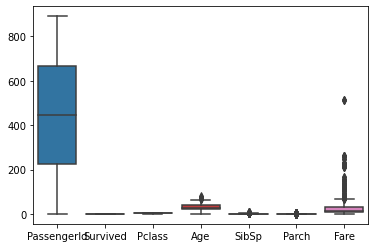

In [8]:
sns.boxplot(data=data)

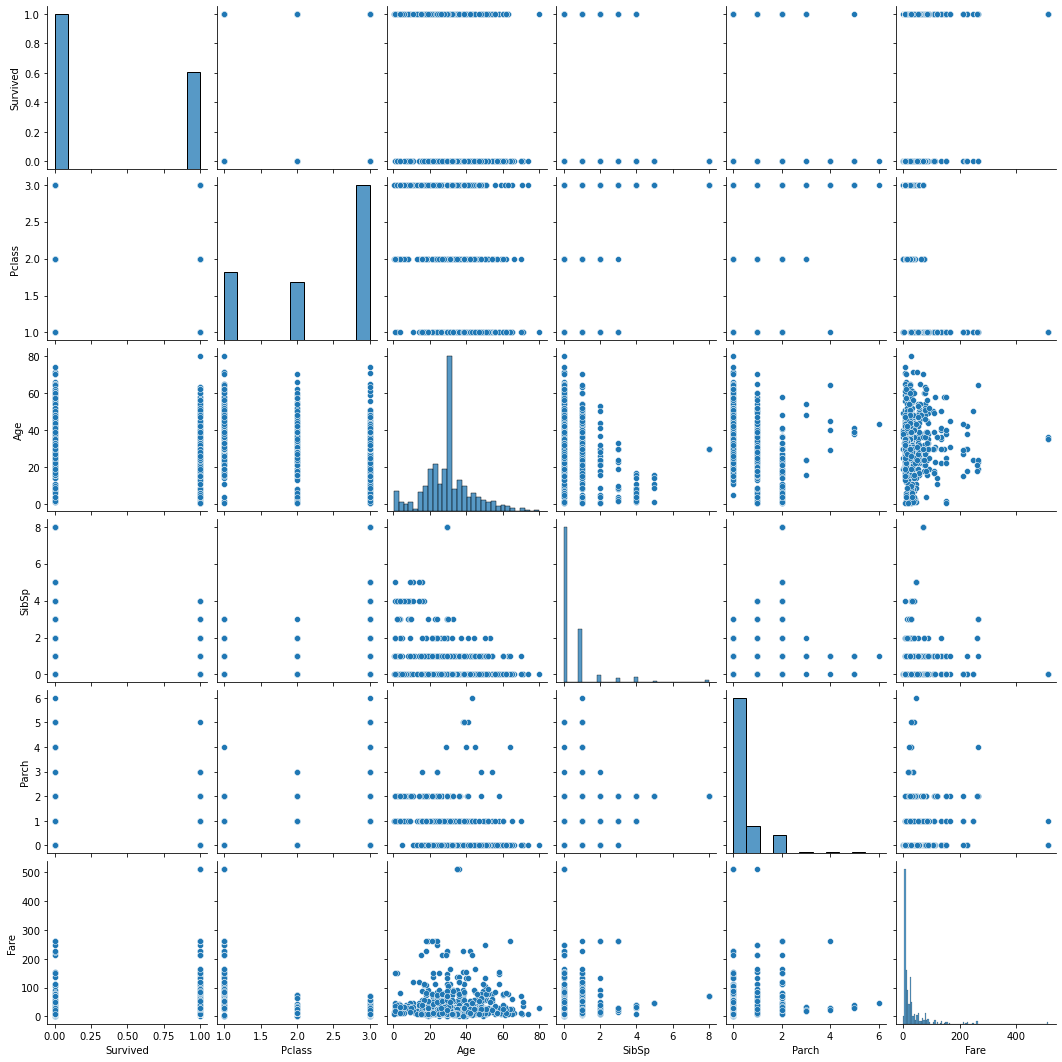

In [63]:
sns.pairplot(data=data)

### Clean the data if its not!

<AxesSubplot:>

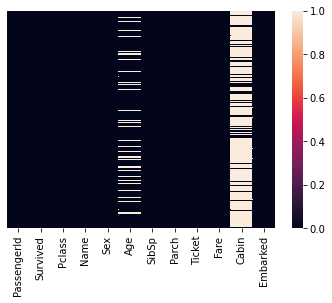

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,xticklabels=True)

In [10]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print("As we can see column Age,Cabin and Embarked contains the null value. We have to replace the null value with suitable aggregate values like mean ,median and mode or just simply drop the columns. ")

As we can see column Age,Cabin and Embarked contains the null value. We have to replace the null value with suitable aggregate values like mean ,median and mode or just simply drop the columns. 


In [12]:
data['Age'] = data['Age'].fillna(data.Age.mean())
data = data.drop(['Cabin','Embarked'],axis=1)

In [13]:
data =data.drop(['PassengerId','Name','Ticket'],axis=1)


In [14]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


In [15]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Visualize the data 

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

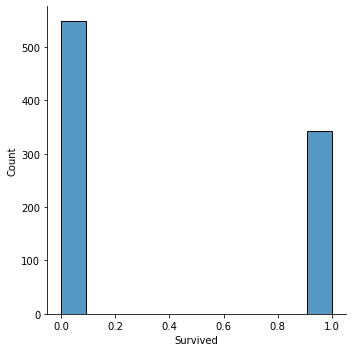

In [17]:
sns.displot(data=data,x='Survived',kde=False)

In [18]:
print('As its shown clearly that the number of people died is more than the number of people survived. Note:0and 1 represnt the number of people died or survived')

As its shown clearly that the number of people died is more than the number of people survived. Note:0and 1 represnt the number of people died or survived


<AxesSubplot:xlabel='Survived', ylabel='count'>

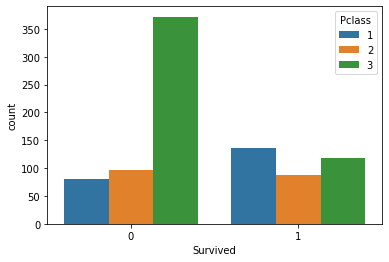

In [23]:
sns.countplot(data=data,x='Survived',hue='Pclass')

In [26]:
print("As we can see here the ratio of people died in 1st class is less than the people in 2nd and 3rd class.Also the ratio of people survied in 1st class is more than the 2nd and 3rd class.")
       

As we can see here the ratio of people died in 1st class is less than the people in 2nd and 3rd class.Also the ratio of people survied in 1st class is more than the 2nd and 3rd class.


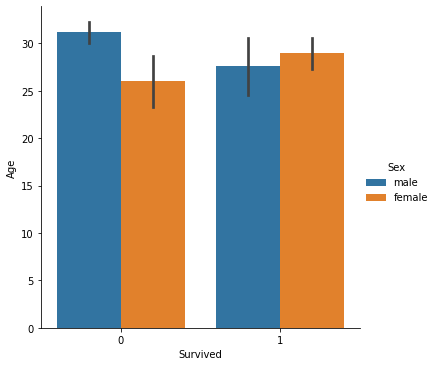

In [27]:
sns.catplot(data=data,x="Survived",y="Age",kind="bar",hue='Sex')

In [28]:
print("From the given graph it is shown clearly that,the male who are died are 30+ and Female who are died are 25+.And the male who are survived are between the age 25-30 and female who are survived are also between the age 25-30.")

From the given graph it is shown clearly that,the male who are died are 30+ and Female who are died are 25+.And the male who are survived are between the age 25-30 and female who are survived are also between the age 25-30.


<AxesSubplot:xlabel='SibSp', ylabel='count'>

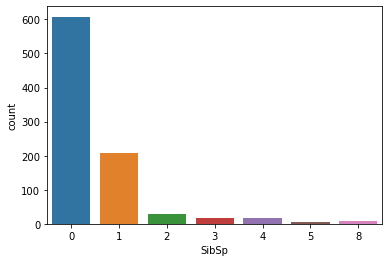

In [54]:
sns.countplot(x='SibSp',data=data)

In [55]:
print("Here from the graph 0 represnt no Sibling or spouse,1 represnt spouse,2 represent 2 sibling or 1 spouse and so on...")

Here from the graph 0 represnt no Sibling or spouse,1 represnt spouse,2 represent 2 sibling or 1 spouse and so on...


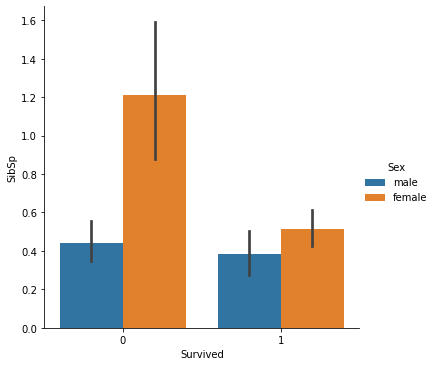

In [57]:
sns.catplot(data=data,x="Survived",y="SibSp",kind='bar',hue="Sex")

In [39]:
print("Here sibsb define siblings or spouse who are survived or died in the titanic.so the number of female sibsp are more than the males in terms of death,And the number of female sibsp are also more than the males in terms of survival.")

Here sibsb define siblings or spouse who are survived or died in the titanic.so the number of female sibsp are more than the males in terms of death,And the number of female sibsp are also more than the males in terms of survival.


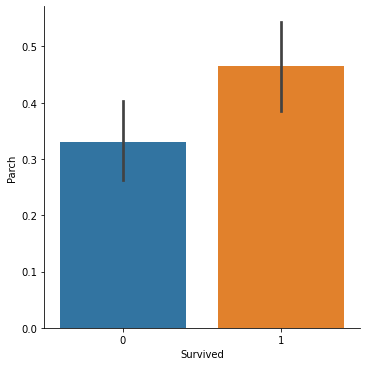

In [44]:
sns.catplot(data=data,x="Survived",y="Parch",kind='bar')

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

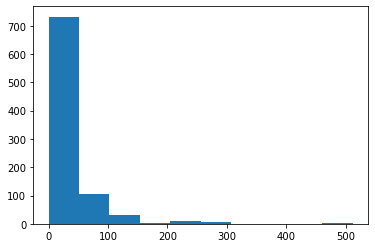

In [60]:
plt.hist(data=data,x="Fare")

In [62]:
print("The average Fare is nearly 700")

The average Fare is nearly 700


## Conclusion 

### Hence, we have Analyzie the whole dataset of Titanic and finded out the suitable results which shows us the number of people died or survived.